In [5]:
#@title Importations

import random
import timeit
import matplotlib.pyplot as plt

In [6]:
#@title Fonctions

def inverser_chaine(chaine):
    mot_inverse = ""
    pile = []
    for c in chaine:
        pile.append(c)
    while len(pile) > 0:
        mot_inverse += pile.pop()
    return mot_inverse


In [7]:
#@title Exercice 3.1

class Pile:
    def __init__(self):
        self._elements = []

    def empiler(self, element):
        self._elements.append(element)
    
    def depiler(self):
        if self.est_vide():
            raise IndexError
        return self._elements.pop()
    
    def est_vide(self):
        return len(self._elements) == 0
    
une_pile = Pile()
try:
    print(une_pile.depiler())
except IndexError:
    print("La pile est vide")

for i in range(5):
    une_pile.empiler(i)

while not une_pile.est_vide():
    print(une_pile.depiler(), end=" ")
print()


La pile est vide
4 3 2 1 0 


In [ ]:
#@title Exercice 3.2

# Aucun code nécessaire. Les deux méthodes sont en O(1)

In [ ]:
#@title Exercice 3.3

def inverser_chaine_pile(chaine):
    mot_inverse = ""
    pile = Pile()
    for c in chaine:
        pile.empiler(c)
    while not pile.est_vide():
        mot_inverse += pile.depiler()
    return mot_inverse

mot_tres_long = "abcdef" * 10000

temps_liste = timeit.timeit(lambda: inverser_chaine(mot_tres_long), number=200)
temps_empiler = timeit.timeit(lambda: inverser_chaine_pile(mot_tres_long), number=200)

print(f"Temps avec liste: {temps_liste:.6f} secondes")
print(f"Temps avec pile : {temps_empiler:.6f} secondes")


# La pile devrait être moins performante.
# Principale raison:
#     Elle utilise la liste, il y a une indirection à chaque opération
#
# En développement logiciel, on est souvent prêt à sacrifier un peu de vitesse pour améliorer la clarté du code.


Temps avec liste: 1.489094 secondes
Temps avec pile : 2.762818 secondes


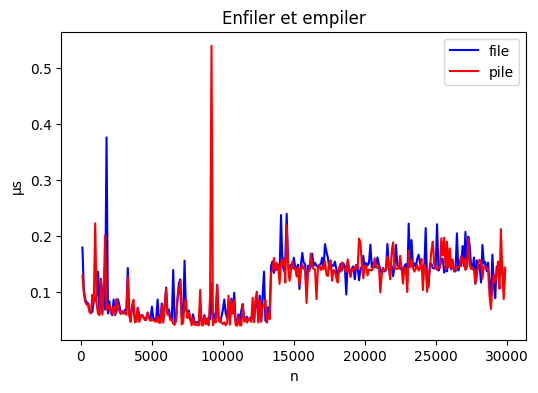

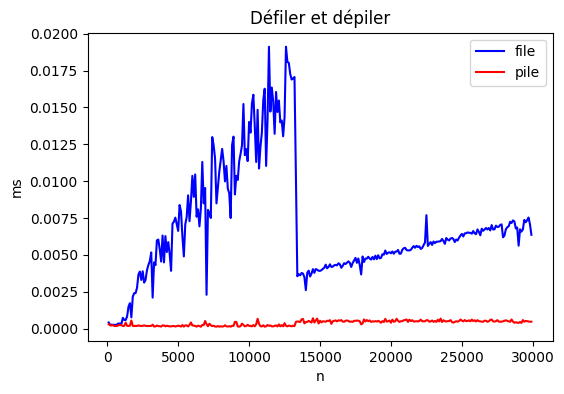

In [32]:
#@title Exercice 3.4

class File:
    def __init__(self):
        self._elements = []

    def enfiler(self, elem):
        self._elements.append(elem)

    def defiler(self):
        if self.est_vide():
            raise IndexError
        return self._elements.pop(0)

    def est_vide(self):
        return len(self._elements) == 0

def enfiler_elements(une_file, elements):
    for element in elements:
        une_file.enfiler(element)

def defiler_elements(une_file):
    while not une_file.est_vide():
        une_file.defiler()

def empiler_elements(une_pile, elements):
    for element in elements:
        une_pile.empiler(element)

def depiler_elements(une_pile):
    while not une_pile.est_vide():
        une_pile.depiler()

temps_empiler = []
temps_enfiler = []

temps_depiler = []
temps_defiler = []

quantite_donnees = list(range(100, 30000, 100))

for n in quantite_donnees:
    une_file = File()
    une_pile = Pile()
    elements = list(range(n))

    temps_execution_file = timeit.timeit(lambda: enfiler_elements(une_file, elements), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération enfiler quand n grandit
    temps_enfiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: empiler_elements(une_pile, elements), number=1)
    temp_pile = temps_execution_pile / n   # On veut le coût moyen de l'opération defiler quand n grandit
    temps_empiler.append(temp_pile * 1000000)

    temps_execution_file = timeit.timeit(lambda: defiler_elements(une_file), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération empiler quand n grandit
    temps_defiler.append(temp_file * 1000)

    temps_execution_pile = timeit.timeit(lambda: depiler_elements(une_pile), number=1)
    temp_pile = temps_execution_pile / n   # On veut le coût moyen de l'opération depiler quand n grandit
    temps_depiler.append(temp_pile * 1000)


plt.figure(figsize=(6,4))
plt.title("Enfiler et empiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_enfiler, "-b", label="file")
plt.plot(quantite_donnees, temps_empiler, "-r", label="pile")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.title("Défiler et dépiler")
plt.xlabel("n")
plt.ylabel("ms", rotation=90)
plt.plot(quantite_donnees, temps_defiler, "-b", label="file")
plt.plot(quantite_donnees, temps_depiler, "-r", label="pile")
plt.legend()
plt.show()




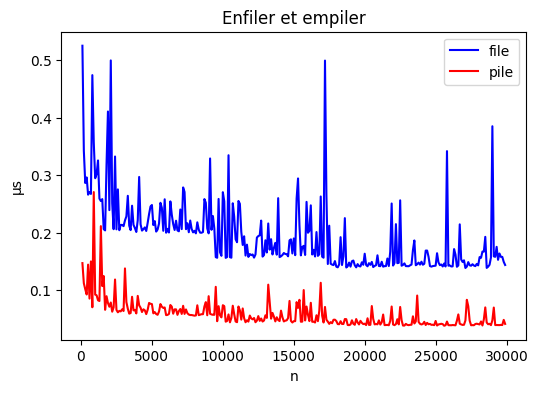

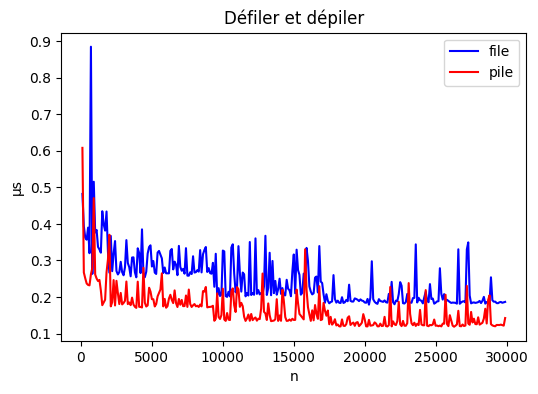

In [41]:
#@title Exercice 3.5

class Noeud:

    def __init__(self, element):
        self._element = element
        self._prochain = None

    def get_element(self):
        return self._element

    def set_prochain(self, prochain):
        self._prochain = prochain

    def get_prochain(self):
        return self._prochain
    
class FileChainee():
    def __init__(self):
        self._tete = None
        self._fin = None

    def enfiler(self, element):
        nouveau_noeud = Noeud(element)
        if self._fin == None:
            self._tete = nouveau_noeud
        else:
            self._fin.set_prochain(nouveau_noeud)
        self._fin = nouveau_noeud

    def defiler(self):
        if self.est_vide():
            raise IndexError
        valeur = self._tete.get_element()
        self._tete = self._tete.get_prochain()
        if self._tete == None:
            self._fin = None
        return valeur
    
    def est_vide(self):
        return self._tete == None

def enfiler_elements(une_file, elements):
    for element in elements:
        une_file.enfiler(element)

def defiler_elements(une_file):
    while not une_file.est_vide():
        une_file.defiler()

def empiler_elements(une_pile, elements):
    for element in elements:
        une_pile.empiler(element)

def depiler_elements(une_pile):
    while not une_pile.est_vide():
        une_pile.depiler()

temps_empiler = []
temps_enfiler = []

temps_depiler = []
temps_defiler = []

quantite_donnees = list(range(100, 30000, 100))

for n in quantite_donnees:
    une_file = FileChainee()
    une_pile = Pile()
    elements = list(range(n))

    temps_execution_file = timeit.timeit(lambda: enfiler_elements(une_file, elements), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération enfiler quand n grandit
    temps_enfiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: empiler_elements(une_pile, elements), number=1)
    temp_pile = temps_execution_pile / n   # On veut le coût moyen de l'opération defiler quand n grandit
    temps_empiler.append(temp_pile * 1000000)

    temps_execution_file = timeit.timeit(lambda: defiler_elements(une_file), number=1)
    temp_file = temps_execution_file / n   # On veut le coût moyen de l'opération empiler quand n grandit
    temps_defiler.append(temp_file * 1000000)

    temps_execution_pile = timeit.timeit(lambda: depiler_elements(une_pile), number=1)
    temp_pile = temps_execution_pile / n   # On veut le coût moyen de l'opération depiler quand n grandit
    temps_depiler.append(temp_pile * 1000000)


plt.figure(figsize=(6,4))
plt.title("Enfiler et empiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_enfiler, "-b", label="file")
plt.plot(quantite_donnees, temps_empiler, "-r", label="pile")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.title("Défiler et dépiler")
plt.xlabel("n")
plt.ylabel("µs", rotation=90)
plt.plot(quantite_donnees, temps_defiler, "-b", label="file")
plt.plot(quantite_donnees, temps_depiler, "-r", label="pile")
plt.legend()
plt.show()


In [42]:
#@title Exercice 3.6

def inverser_pile(une_pile):
    une_file = FileChainee()
    while not une_pile.est_vide():
        une_file.enfiler(une_pile.depiler())
    while not une_file.est_vide():
        une_pile.empiler(une_file.defiler())

une_pile = Pile()
for i in range(10):
    une_pile.empiler(i)

inverser_pile(une_pile)

while not une_pile.est_vide():
    print(une_pile.depiler(), end=" ")
print()


0 1 2 3 4 5 6 7 8 9 


In [ ]:
#@title Exercice 2.7

def enlever_doublons(elements):
    i = 0
    liste_sans_doublons = []
    for element in elements:
        if element not in liste_sans_doublons:
            liste_sans_doublons.append(element)
    return liste_sans_doublons

liste = [2, 4, 5, 4, 2, 8, 7, 6, 5, 9, 8]
print(enlever_doublons(liste))

def trouver_mediane(elements):
    """
        Trouve la médiane dans une liste d'entiers triés.
    """
    milieu = len(elements) // 2
    if len(elements) % 2 == 0:
        return (elements[milieu - 1] + elements[milieu]) / 2
    else:
        return elements[milieu]

liste_triee_1 = [2, 4, 5, 7, 9]
print(trouver_mediane(liste_triee_1))

liste_triee_2 = [2, 4, 5, 7, 9, 10]
print(trouver_mediane(liste_triee_2))

def somme_valeurs_pairs(liste):
    somme = 0
    for valeur in liste:
        if valeur % 2 == 0:
            somme += valeur
    return somme

liste = [2, 3, 4, 5, 6, 8, 2]
print(somme_valeurs_pairs(liste))


def est_bissextile(annee):
    return annee % 400 == 0 or (annee % 4 == 0 and annee % 100 != 0)

print(est_bissextile(2000))
print(est_bissextile(2004))
print(est_bissextile(1900))
print(est_bissextile(2025))